In [1474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st
from joblib import dump 

Exportamos diferentes datasets del ayuntamiento de Barcelona desde aquí https://dades.ajuntament.barcelona.cat/la-ciutat-al-dia/

In [1475]:
df_carne_y_pescado = pd.read_csv("C:/Users/esteb/Downloads/Proyecto_final/carne_pescado.csv", sep=";")

In [1476]:
#En este caso traducimos los nombres del catalán al castellano
df_carne_y_pescado = df_carne_y_pescado.rename(columns = {"Llenguado": "Lenguado", "Llobarro": "Lubina", "Lluç": "Merluza", "Orada": "Dorada", "Pollastre": "Pollo", "Porcí": "Cerdo"})


In [1477]:
df_carne_y_pescado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Dia       891 non-null    object
 1   Lenguado  873 non-null    object
 2   Lubina    873 non-null    object
 3   Merluza   872 non-null    object
 4   Dorada    873 non-null    object
 5   Pollo     178 non-null    object
 6   Cerdo     179 non-null    object
dtypes: object(7)
memory usage: 48.9+ KB


In [1478]:
#pasaremos de str a floats los precios

df_carne_y_pescado[["Lenguado","Lubina","Merluza", "Dorada", "Pollo", "Cerdo"]] = df_carne_y_pescado[["Lenguado","Lubina","Merluza", "Dorada", "Pollo", "Cerdo"]].replace(",", ".", regex=True).astype("float")


In [1479]:
df_carne_y_pescado.head()

,Dia,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo
0,2020-01-03 00:00:00,15.5,3.7,6.0,4.2,NaN,NaN
1,2020-01-04 00:00:00,15.5,4.8,6.5,5.4,NaN,NaN
2,2020-01-07 00:00:00,14.5,4.8,5.0,5.0,NaN,NaN
3,2020-01-08 00:00:00,14.5,3.8,6.0,4.8,NaN,NaN
4,2020-01-09 00:00:00,19.0,3.9,6.5,4.7,NaN,NaN


In [1480]:
df_carne_y_pescado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dia       891 non-null    object 
 1   Lenguado  873 non-null    float64
 2   Lubina    873 non-null    float64
 3   Merluza   872 non-null    float64
 4   Dorada    873 non-null    float64
 5   Pollo     178 non-null    float64
 6   Cerdo     179 non-null    float64
dtypes: float64(6), object(1)
memory usage: 48.9+ KB


In [1481]:
# Reducimos la información de la fecha obtenida en el dataset a año, mes y día
df_carne_y_pescado["Dia"] = df_carne_y_pescado["Dia"].str[:10]

In [1482]:
df_carne_y_pescado.head()

,Dia,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo
0,2020-01-03,15.5,3.7,6.0,4.2,NaN,NaN
1,2020-01-04,15.5,4.8,6.5,5.4,NaN,NaN
2,2020-01-07,14.5,4.8,5.0,5.0,NaN,NaN
3,2020-01-08,14.5,3.8,6.0,4.8,NaN,NaN
4,2020-01-09,19.0,3.9,6.5,4.7,NaN,NaN


In [1483]:
#Pasamos la información de Dia de str a datetime
df_carne_y_pescado["Dia"] = pd.to_datetime(df_carne_y_pescado["Dia"])

In [1484]:
df_carne_y_pescado.head()

,Dia,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo
0,2020-01-03,15.5,3.7,6.0,4.2,NaN,NaN
1,2020-01-04,15.5,4.8,6.5,5.4,NaN,NaN
2,2020-01-07,14.5,4.8,5.0,5.0,NaN,NaN
3,2020-01-08,14.5,3.8,6.0,4.8,NaN,NaN
4,2020-01-09,19.0,3.9,6.5,4.7,NaN,NaN


In [1485]:
df_carne_y_pescado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Dia       891 non-null    datetime64[ns]
 1   Lenguado  873 non-null    float64       
 2   Lubina    873 non-null    float64       
 3   Merluza   872 non-null    float64       
 4   Dorada    873 non-null    float64       
 5   Pollo     178 non-null    float64       
 6   Cerdo     179 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 48.9 KB


In [1486]:
df_frutas_hortalizas = pd.read_csv("C:/Users/esteb/Downloads/Proyecto_final/frutas_hortalizas.csv", sep=";")

In [1487]:
df_frutas_hortalizas = df_frutas_hortalizas.rename(columns =  {"Ceba": "Cebolla", "Patata": "Patata", "Plàtan": "Plátano", "Poma": "Manzana", "Taronja": "Naranja"})

In [1488]:
df_frutas_hortalizas.head()

,Dia,Cebolla,Patata,Plátano,Manzana,Naranja
0,2020-01-02 00:00:00,"0,3","0,44","1,4","0,65","0,8"
1,2020-01-03 00:00:00,"0,3","0,44","1,4","0,65","0,8"
2,2020-01-07 00:00:00,"0,26","0,46","1,15","0,65","0,7"
3,2020-01-08 00:00:00,"0,26","0,46","1,15","0,65","0,7"
4,2020-01-09 00:00:00,"0,26","0,46","1,15","0,65","0,7"


In [1489]:
df_frutas_hortalizas[["Cebolla", "Patata", "Plátano", "Manzana", "Naranja"]] = df_frutas_hortalizas[["Cebolla", "Patata", "Plátano", "Manzana", "Naranja"]].replace(",",".", regex=True).astype("float")

In [1490]:
df_frutas_hortalizas.head()

,Dia,Cebolla,Patata,Plátano,Manzana,Naranja
0,2020-01-02 00:00:00,0.30,0.44,1.40,0.65,0.8
1,2020-01-03 00:00:00,0.30,0.44,1.40,0.65,0.8
2,2020-01-07 00:00:00,0.26,0.46,1.15,0.65,0.7
3,2020-01-08 00:00:00,0.26,0.46,1.15,0.65,0.7
4,2020-01-09 00:00:00,0.26,0.46,1.15,0.65,0.7


In [1491]:
df_frutas_hortalizas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dia      857 non-null    object 
 1   Cebolla  856 non-null    float64
 2   Patata   857 non-null    float64
 3   Plátano  857 non-null    float64
 4   Manzana  857 non-null    float64
 5   Naranja  856 non-null    float64
dtypes: float64(5), object(1)
memory usage: 40.3+ KB


In [1492]:
df_frutas_hortalizas["Dia"] = df_frutas_hortalizas["Dia"].str[:10]

In [1493]:
df_frutas_hortalizas.head()

,Dia,Cebolla,Patata,Plátano,Manzana,Naranja
0,2020-01-02,0.30,0.44,1.40,0.65,0.8
1,2020-01-03,0.30,0.44,1.40,0.65,0.8
2,2020-01-07,0.26,0.46,1.15,0.65,0.7
3,2020-01-08,0.26,0.46,1.15,0.65,0.7
4,2020-01-09,0.26,0.46,1.15,0.65,0.7


In [1494]:
df_frutas_hortalizas["Dia"] = pd.to_datetime(df_frutas_hortalizas["Dia"])

In [1495]:
df_frutas_hortalizas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dia      857 non-null    datetime64[ns]
 1   Cebolla  856 non-null    float64       
 2   Patata   857 non-null    float64       
 3   Plátano  857 non-null    float64       
 4   Manzana  857 non-null    float64       
 5   Naranja  856 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 40.3 KB


In [1496]:
df_gasolina_diesel = pd.read_csv("C:/Users/esteb/Downloads/Proyecto_final/gasolina_diesel.csv", sep=";")

In [1497]:
df_gasolina_diesel.head()

,Dia,Diesel A,Gasolina 95
0,2020-03-30 00:00:00,"1,0699","1,1647"
1,2020-03-31 00:00:00,"1,0628","1,1575"
2,2020-04-01 00:00:00,"1,0555","1,1506"
3,2020-04-02 00:00:00,"1,0515","1,1466"
4,2020-04-03 00:00:00,"1,0486","1,1432"


In [1498]:
df_gasolina_diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Dia          1308 non-null   object
 1   Diesel A     1308 non-null   object
 2   Gasolina 95  1308 non-null   object
dtypes: object(3)
memory usage: 30.8+ KB


In [1499]:
df_gasolina_diesel[["Diesel A", "Gasolina 95"]] = df_gasolina_diesel[["Diesel A", "Gasolina 95"]].replace(",",".", regex=True).astype("float")

In [1500]:
df_gasolina_diesel.head()

,Dia,Diesel A,Gasolina 95
0,2020-03-30 00:00:00,1.0699,1.1647
1,2020-03-31 00:00:00,1.0628,1.1575
2,2020-04-01 00:00:00,1.0555,1.1506
3,2020-04-02 00:00:00,1.0515,1.1466
4,2020-04-03 00:00:00,1.0486,1.1432


In [1501]:
df_gasolina_diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dia          1308 non-null   object 
 1   Diesel A     1308 non-null   float64
 2   Gasolina 95  1308 non-null   float64
dtypes: float64(2), object(1)
memory usage: 30.8+ KB


In [1502]:
df_gasolina_diesel["Dia"] = df_gasolina_diesel["Dia"].str[:10]

In [1503]:
df_gasolina_diesel.head()

,Dia,Diesel A,Gasolina 95
0,2020-03-30,1.0699,1.1647
1,2020-03-31,1.0628,1.1575
2,2020-04-01,1.0555,1.1506
3,2020-04-02,1.0515,1.1466
4,2020-04-03,1.0486,1.1432


In [1504]:
df_gasolina_diesel["Dia"] = pd.to_datetime(df_gasolina_diesel["Dia"])

In [1505]:
df_gasolina_diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dia          1308 non-null   datetime64[ns]
 1   Diesel A     1308 non-null   float64       
 2   Gasolina 95  1308 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 30.8 KB


In [1506]:
#Mezclamos en una sola columna el precio de los combustibles
df_combustibles = df_gasolina_diesel.assign(Precio_combustibles =(df_gasolina_diesel["Diesel A"] + df_gasolina_diesel["Gasolina 95"]) / 2)

In [1507]:
df_combustibles.head()

,Dia,Diesel A,Gasolina 95,Precio_combustibles
0,2020-03-30,1.0699,1.1647,1.11730
1,2020-03-31,1.0628,1.1575,1.11015
2,2020-04-01,1.0555,1.1506,1.10305
3,2020-04-02,1.0515,1.1466,1.09905
4,2020-04-03,1.0486,1.1432,1.09590


In [1508]:
df_combustibles = df_combustibles.filter(["Dia", "Precio_combustibles"])

In [1509]:
df_combustibles.head()

,Dia,Precio_combustibles
0,2020-03-30,1.11730
1,2020-03-31,1.11015
2,2020-04-01,1.10305
3,2020-04-02,1.09905
4,2020-04-03,1.09590


In [1510]:
df_electricidad = pd.read_csv("C:/Users/esteb/Downloads/Proyecto_final/electricidad.csv", sep=";")

In [1511]:
df_electricidad = df_electricidad.rename(columns = {"Series 1": "Electricidad MWh"})

In [1512]:
df_electricidad.head()

,Dia,Electricidad MWh
0,2019-01-01 00:00:00,"63,4545833333333"
1,2019-01-02 00:00:00,"60,5408333333333"
2,2019-01-03 00:00:00,"64,0095833333333"
3,2019-01-04 00:00:00,"66,8358333333333"
4,2019-01-05 00:00:00,"65,32875"


In [1513]:
df_electricidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dia               1784 non-null   object
 1   Electricidad MWh  1784 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [1514]:
df_electricidad[["Electricidad MWh"]] = df_electricidad[["Electricidad MWh"]].replace(",",".", regex=True).astype("float")

In [1515]:
df_electricidad.head()

,Dia,Electricidad MWh
0,2019-01-01 00:00:00,63.454583
1,2019-01-02 00:00:00,60.540833
2,2019-01-03 00:00:00,64.009583
3,2019-01-04 00:00:00,66.835833
4,2019-01-05 00:00:00,65.328750


In [1516]:
df_electricidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dia               1784 non-null   object 
 1   Electricidad MWh  1784 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.0+ KB


In [1517]:
df_electricidad["Dia"] = df_electricidad["Dia"].str[:10]

In [1518]:
df_electricidad.head()

,Dia,Electricidad MWh
0,2019-01-01,63.454583
1,2019-01-02,60.540833
2,2019-01-03,64.009583
3,2019-01-04,66.835833
4,2019-01-05,65.328750


In [1519]:
df_electricidad["Dia"] = pd.to_datetime(df_electricidad["Dia"])

In [1520]:
df_electricidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Dia               1784 non-null   datetime64[ns]
 1   Electricidad MWh  1784 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.0 KB


In [1521]:
df_precipitaciones = pd.read_csv("C:/Users/esteb/Downloads/Proyecto_final/precipitaciones.csv", sep=";")

In [1522]:
df_precipitaciones.head()

,Dia,Barcelona - el Raval,Barcelona - Observatori Fabra,Barcelona - Zona Universitària
0,2020-02-01 00:00:00,0,0,0
1,2020-02-02 00:00:00,0,0,0
2,2020-02-03 00:00:00,0,0,0
3,2020-02-04 00:00:00,0,0,0
4,2020-02-05 00:00:00,0,0,0


In [1523]:
#en lugar de tener las columnas de los barrios, calcularemos la media de estos barrios y crearemos una unica columna. 
#pero antes tenemos que comprobar el tipo de datos que son las columnas

df_precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Dia                             1392 non-null   object
 1   Barcelona - el Raval            1367 non-null   object
 2   Barcelona - Observatori Fabra   1382 non-null   object
 3   Barcelona - Zona Universitària  1368 non-null   object
dtypes: object(4)
memory usage: 43.6+ KB


In [1524]:
# Son strings, por lo que tendremos que pasar estos datos de str a float
# Al intentar hacerlo, habían filas que no se podian cambiar de str a float, por lo que hemos añadido el código 
# regex = True que nos permite buscar todas las comas y reemplazarlas por puntos convirtiendo asi las str a floats

df_precipitaciones[["Barcelona - el Raval", "Barcelona - Observatori Fabra", "Barcelona - Zona Universitària"]] = df_precipitaciones[["Barcelona - el Raval", "Barcelona - Observatori Fabra", "Barcelona - Zona Universitària"]].replace(",", ".", regex=True).astype("float")

In [1525]:
df_precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dia                             1392 non-null   object 
 1   Barcelona - el Raval            1367 non-null   float64
 2   Barcelona - Observatori Fabra   1382 non-null   float64
 3   Barcelona - Zona Universitària  1368 non-null   float64
dtypes: float64(3), object(1)
memory usage: 43.6+ KB


In [1526]:
# Una vez hemos pasado los datos a float, podemos calcular la media 

df_precipitaciones = df_precipitaciones.assign(Precipitaciones_Barcelona =(df_precipitaciones["Barcelona - el Raval"] + df_precipitaciones["Barcelona - Observatori Fabra"] + df_precipitaciones["Barcelona - Zona Universitària"]) / 3)



In [1527]:
df_precipitaciones.head()

,Dia,Barcelona - el Raval,Barcelona - Observatori Fabra,Barcelona - Zona Universitària,Precipitaciones_Barcelona
0,2020-02-01 00:00:00,0.0,0.0,0.0,0.0
1,2020-02-02 00:00:00,0.0,0.0,0.0,0.0
2,2020-02-03 00:00:00,0.0,0.0,0.0,0.0
3,2020-02-04 00:00:00,0.0,0.0,0.0,0.0
4,2020-02-05 00:00:00,0.0,0.0,0.0,0.0


In [1528]:
# Una vez tenemos la media, eliminamos las demás columnas

df_precipitaciones = df_precipitaciones.filter(["Dia", "Precipitaciones_Barcelona"])
df_precipitaciones.head()

,Dia,Precipitaciones_Barcelona
0,2020-02-01 00:00:00,0.0
1,2020-02-02 00:00:00,0.0
2,2020-02-03 00:00:00,0.0
3,2020-02-04 00:00:00,0.0
4,2020-02-05 00:00:00,0.0


In [1529]:
df_precipitaciones["Dia"] = df_precipitaciones["Dia"].str[:10]

In [1530]:
df_precipitaciones.head()

,Dia,Precipitaciones_Barcelona
0,2020-02-01,0.0
1,2020-02-02,0.0
2,2020-02-03,0.0
3,2020-02-04,0.0
4,2020-02-05,0.0


In [1531]:
df_precipitaciones["Dia"] = pd.to_datetime(df_precipitaciones["Dia"])

In [1532]:
df_precipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Dia                        1392 non-null   datetime64[ns]
 1   Precipitaciones_Barcelona  1337 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.9 KB


In [1533]:
df_temperaturas = pd.read_csv("C:/Users/esteb/Downloads/Proyecto_final/temperaturas.csv", sep=";")

In [1534]:
# Seguimos el mimso proceso que con las precipitaciones
df_temperaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Dia                             1392 non-null   object
 1   Barcelona - el Raval            1367 non-null   object
 2   Barcelona - Observatori Fabra   1382 non-null   object
 3   Barcelona - Zona Universitària  1368 non-null   object
dtypes: object(4)
memory usage: 43.6+ KB


In [1535]:
df_temperaturas[["Barcelona - el Raval", "Barcelona - Observatori Fabra", "Barcelona - Zona Universitària"]] = df_temperaturas[["Barcelona - el Raval", "Barcelona - Observatori Fabra", "Barcelona - Zona Universitària"]].replace(",", ".", regex=True).astype("float")


In [1536]:
df_temperaturas.head()

,Dia,Barcelona - el Raval,Barcelona - Observatori Fabra,Barcelona - Zona Universitària
0,2020-02-01 00:00:00,15.71,13.97,14.87
1,2020-02-02 00:00:00,17.48,15.32,16.76
2,2020-02-03 00:00:00,18.13,17.48,17.63
3,2020-02-04 00:00:00,16.05,13.03,15.79
4,2020-02-05 00:00:00,12.62,9.80,11.03


In [1537]:
df_temperaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dia                             1392 non-null   object 
 1   Barcelona - el Raval            1367 non-null   float64
 2   Barcelona - Observatori Fabra   1382 non-null   float64
 3   Barcelona - Zona Universitària  1368 non-null   float64
dtypes: float64(3), object(1)
memory usage: 43.6+ KB


In [1538]:
df_temperaturas.head()

,Dia,Barcelona - el Raval,Barcelona - Observatori Fabra,Barcelona - Zona Universitària
0,2020-02-01 00:00:00,15.71,13.97,14.87
1,2020-02-02 00:00:00,17.48,15.32,16.76
2,2020-02-03 00:00:00,18.13,17.48,17.63
3,2020-02-04 00:00:00,16.05,13.03,15.79
4,2020-02-05 00:00:00,12.62,9.80,11.03


In [1539]:
df_temperaturas = df_temperaturas.assign(Temperatura_Barcelona =(df_temperaturas["Barcelona - el Raval"] + df_temperaturas["Barcelona - Observatori Fabra"] + df_temperaturas["Barcelona - Zona Universitària"]) / 3)

In [1540]:
df_temperaturas.head()

,Dia,Barcelona - el Raval,Barcelona - Observatori Fabra,Barcelona - Zona Universitària,Temperatura_Barcelona
0,2020-02-01 00:00:00,15.71,13.97,14.87,14.850000
1,2020-02-02 00:00:00,17.48,15.32,16.76,16.520000
2,2020-02-03 00:00:00,18.13,17.48,17.63,17.746667
3,2020-02-04 00:00:00,16.05,13.03,15.79,14.956667
4,2020-02-05 00:00:00,12.62,9.80,11.03,11.150000


In [1541]:
df_temperaturas = df_temperaturas.filter(["Dia", "Temperatura_Barcelona"])

In [1542]:
df_temperaturas.head()

,Dia,Temperatura_Barcelona
0,2020-02-01 00:00:00,14.850000
1,2020-02-02 00:00:00,16.520000
2,2020-02-03 00:00:00,17.746667
3,2020-02-04 00:00:00,14.956667
4,2020-02-05 00:00:00,11.150000


In [1543]:
df_temperaturas["Dia"] = df_temperaturas["Dia"].str[:10]

In [1544]:
df_temperaturas.head()

,Dia,Temperatura_Barcelona
0,2020-02-01,14.850000
1,2020-02-02,16.520000
2,2020-02-03,17.746667
3,2020-02-04,14.956667
4,2020-02-05,11.150000


In [1545]:
df_temperaturas["Dia"] = pd.to_datetime(df_temperaturas["Dia"])

In [1546]:
df_temperaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Dia                    1392 non-null   datetime64[ns]
 1   Temperatura_Barcelona  1337 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.9 KB


In [1547]:
#Una vez tenemos los datos importados, ahora los mezclaremos

alimentos = pd.merge(df_carne_y_pescado, df_frutas_hortalizas, on="Dia", how="left", sort=False)

In [1548]:
alimentos.head()

,Dia,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo,Cebolla,Patata,Plátano,Manzana,Naranja
0,2020-01-03,15.5,3.7,6.0,4.2,NaN,NaN,0.30,0.44,1.40,0.65,0.8
1,2020-01-04,15.5,4.8,6.5,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,14.5,4.8,5.0,5.0,NaN,NaN,0.26,0.46,1.15,0.65,0.7
3,2020-01-08,14.5,3.8,6.0,4.8,NaN,NaN,0.26,0.46,1.15,0.65,0.7
4,2020-01-09,19.0,3.9,6.5,4.7,NaN,NaN,0.26,0.46,1.15,0.65,0.7


In [1549]:
alimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Dia       891 non-null    datetime64[ns]
 1   Lenguado  873 non-null    float64       
 2   Lubina    873 non-null    float64       
 3   Merluza   872 non-null    float64       
 4   Dorada    873 non-null    float64       
 5   Pollo     178 non-null    float64       
 6   Cerdo     179 non-null    float64       
 7   Cebolla   695 non-null    float64       
 8   Patata    696 non-null    float64       
 9   Plátano   696 non-null    float64       
 10  Manzana   696 non-null    float64       
 11  Naranja   696 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 83.7 KB


In [1550]:
alimentos = alimentos.sort_values("Dia").reset_index(drop=True) #ordenamos el dataframe por fecha

In [1551]:
alimentos.head()

,Dia,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo,Cebolla,Patata,Plátano,Manzana,Naranja
0,2020-01-03,15.5,3.7,6.0,4.2,NaN,NaN,0.30,0.44,1.40,0.65,0.8
1,2020-01-04,15.5,4.8,6.5,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,14.5,4.8,5.0,5.0,NaN,NaN,0.26,0.46,1.15,0.65,0.7
3,2020-01-08,14.5,3.8,6.0,4.8,NaN,NaN,0.26,0.46,1.15,0.65,0.7
4,2020-01-09,19.0,3.9,6.5,4.7,NaN,NaN,0.26,0.46,1.15,0.65,0.7


In [1552]:
prevariables1 = pd.merge(df_combustibles, df_electricidad, on="Dia", how="left", sort=False)

In [1553]:
prevariables2 = pd.merge(df_temperaturas, df_precipitaciones, on="Dia", how="left", sort=False)

In [1554]:
variables = pd.merge(prevariables1, prevariables2, on="Dia", how="left", sort=False)

In [1555]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Dia                        1308 non-null   datetime64[ns]
 1   Precio_combustibles        1308 non-null   float64       
 2   Electricidad MWh           1303 non-null   float64       
 3   Temperatura_Barcelona      1257 non-null   float64       
 4   Precipitaciones_Barcelona  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 51.2 KB


In [1556]:
variables = variables.sort_values("Dia").reset_index(drop=True)

In [1557]:
variables.head()

,Dia,Precio_combustibles,Electricidad MWh,Temperatura_Barcelona,Precipitaciones_Barcelona
0,2020-03-30,1.11730,19.049583,9.150000,5.400000
1,2020-03-31,1.11015,20.550000,10.426667,3.166667
2,2020-04-01,1.10305,26.201667,10.230000,16.700000
3,2020-04-02,1.09905,23.897500,11.050000,0.000000
4,2020-04-03,1.09590,23.728750,12.156667,0.000000


In [1558]:
df = pd.merge(alimentos, variables, on="Dia", how="left", sort=False)

In [1559]:
df.head()

,Dia,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo,Cebolla,Patata,Plátano,Manzana,Naranja,Precio_combustibles,Electricidad MWh,Temperatura_Barcelona,Precipitaciones_Barcelona
0,2020-01-03,15.5,3.7,6.0,4.2,NaN,NaN,0.30,0.44,1.40,0.65,0.8,NaN,NaN,NaN,NaN
1,2020-01-04,15.5,4.8,6.5,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,14.5,4.8,5.0,5.0,NaN,NaN,0.26,0.46,1.15,0.65,0.7,NaN,NaN,NaN,NaN
3,2020-01-08,14.5,3.8,6.0,4.8,NaN,NaN,0.26,0.46,1.15,0.65,0.7,NaN,NaN,NaN,NaN
4,2020-01-09,19.0,3.9,6.5,4.7,NaN,NaN,0.26,0.46,1.15,0.65,0.7,NaN,NaN,NaN,NaN


In [1560]:
#Ahora los agruparemos por semanas y años, eliminando así muchos NaN


def agrupar_semanas(df):
    # Crear una columna con la semana
    df["Semana"] = df["Dia"].dt.isocalendar().week

    # Crear una columna con el año
    df["Año"] = df["Dia"].dt.year

    # Agrupación por semana y año
    df_semanal = df.groupby(["Semana", "Año"])

    # Se calcula el promedio de los precios de cada semana
    df_semanal_promedio = df_semanal.agg(np.mean)

    return df_semanal_promedio

df_semanal = agrupar_semanas(df)

In [1561]:
df_semanal.head(10)

Dia  Lenguado  Lubina  Merluza  Dorada  Pollo   
Semana Año                                                                  
1      2020 2020-01-03 12:00:00    15.500   4.250    6.250   4.800    NaN  \
       2021 2021-01-07 00:00:00    15.825   4.850    6.125   4.425   0.85   
       2022 2022-01-06 00:00:00    17.500   5.525    4.900   4.500   1.23   
       2023 2023-01-04 18:00:00    20.925   5.250    5.575   4.275   1.22   
2      2020 2020-01-09 00:00:00    17.060   4.110    6.100   4.780    NaN   
       2021 2021-01-14 00:00:00    15.000   5.120    5.200   4.420   0.85   
       2022 2022-01-13 00:00:00    16.400   5.600    6.300   4.800   1.13   
       2023 2023-01-12 00:00:00    19.960   5.680    5.320   4.460   1.18   
3      2020 2020-01-16 00:00:00    16.200   4.330    5.380   4.730    NaN   
       2021 2021-01-21 12:00:00    12.000   5.000    4.425   4.400   0.96   

             Cerdo   Cebolla  Patata   Plátano   Manzana   Naranja   
Semana Año                                                           
1      2020    NaN  0.300000   0.440  1.400000  0.650000  0.800000  \
       2021   1.10  0.300000   0.400  1.000000  0.800000  1.075000   
       2022   1.02  0.250000   0.480  1.533333  0.800000  0.816667   
       2023   1.64  0.750000   0.650  1.000000  0.900000  1.100000   
2      2020    NaN  0.260000   0.460  1.150000  0.650000  0.700000   
       2021   1.10  0.450000   0.555  1.200000  1.050000  0.825000   
       2022   1.02  0.250000   0.480  1.650000  0.775000  0.825000   
       2023   1.64  0.750000   0.650  1.000000  0.900000  1.000000   
3      2020    NaN  0.260000   0.460  1.150000  0.650000  0.650000   
       2021   1.10  0.783333   0.470  1.250000  0.933333  0.733333   

             Precio_combustibles  Electricidad MWh  Temperatura_Barcelona   
Semana Año                                                                  
1      2020                  NaN               NaN                    NaN  \
       2021             1.193700         80.543917               4.920667   
       2022             1.464075        187.911875              10.120833   
       2023             1.686287         96.750625              12.085833   
2      2020                  NaN               NaN                    NaN   
       2021             1.209870         81.514583               6.795333   
       2022             1.480960        213.220417               8.994667   
       2023             1.686560         93.601458              11.334667   
3      2020                  NaN               NaN                    NaN   
       2021             1.219337         40.692708              11.349167   

             Precipitaciones_Barcelona  
Semana Año                              
1      2020                        NaN  
       2021                   3.966667  
       2022                   2.516667  
       2023                   0.058333  
2      2020                        NaN  
       2021                   0.000000  
       2022                   0.000000  
       2023                   0.000000  
3      2020                        NaN  
       2021                   1.441667

In [1562]:
df_semanal.drop("Dia", axis=1, inplace=True)

In [1563]:
df_semanal.reset_index(level=["Semana", "Año"], inplace=True)

In [1564]:
df_semanal.head()

,Semana,Año,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo,Cebolla,Patata,Plátano,Manzana,Naranja,Precio_combustibles,Electricidad MWh,Temperatura_Barcelona,Precipitaciones_Barcelona
0,1,2020,15.500,4.250,6.250,4.800,NaN,NaN,0.30,0.44,1.400000,0.65,0.800000,NaN,NaN,NaN,NaN
1,1,2021,15.825,4.850,6.125,4.425,0.85,1.10,0.30,0.40,1.000000,0.80,1.075000,1.193700,80.543917,4.920667,3.966667
2,1,2022,17.500,5.525,4.900,4.500,1.23,1.02,0.25,0.48,1.533333,0.80,0.816667,1.464075,187.911875,10.120833,2.516667
3,1,2023,20.925,5.250,5.575,4.275,1.22,1.64,0.75,0.65,1.000000,0.90,1.100000,1.686287,96.750625,12.085833,0.058333
4,2,2020,17.060,4.110,6.100,4.780,NaN,NaN,0.26,0.46,1.150000,0.65,0.700000,NaN,NaN,NaN,NaN


In [1565]:
df_semanal[df_semanal["Año"]==2020]

,Semana,Año,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo,Cebolla,Patata,Plátano,Manzana,Naranja,Precio_combustibles,Electricidad MWh,Temperatura_Barcelona,Precipitaciones_Barcelona
0,1,2020,15.500000,4.250000,6.250000,4.800000,NaN,NaN,0.300000,0.440000,1.400000,0.650000,0.800000,NaN,NaN,NaN,NaN
4,2,2020,17.060000,4.110000,6.100000,4.780000,NaN,NaN,0.260000,0.460000,1.150000,0.650000,0.700000,NaN,NaN,NaN,NaN
8,3,2020,16.200000,4.330000,5.380000,4.730000,NaN,NaN,0.260000,0.460000,1.150000,0.650000,0.650000,NaN,NaN,NaN,NaN
12,4,2020,16.400000,3.990000,5.075000,4.460000,NaN,NaN,0.260000,0.440000,1.200000,0.650000,0.700000,NaN,NaN,NaN,NaN
16,5,2020,15.600000,3.850000,3.780000,4.300000,NaN,NaN,0.275000,0.450000,1.200000,0.650000,0.775000,NaN,NaN,NaN,NaN
20,6,2020,14.100000,3.830000,3.420000,4.260000,1.09,1.420,0.280000,0.460000,1.100000,0.650000,0.850000,NaN,NaN,NaN,NaN
24,7,2020,14.980000,3.830000,3.280000,4.180000,1.13,1.430,0.290000,0.465000,1.000000,0.650000,0.800000,NaN,NaN,NaN,NaN
28,8,2020,14.460000,4.150000,3.380000,4.490000,1.17,1.460,0.300000,0.470000,1.000000,0.650000,0.800000,NaN,NaN,NaN,NaN
32,9,2020,15.660000,4.150000,3.520000,4.450000,1.17,1.500,0.300000,0.460000,1.150000,0.650000,0.800000,NaN,NaN,NaN,NaN
36,10,2020,14.900000,4.150000,4.500000,4.450000,1.17,1.520,0.300000,0.460000,1.150000,0.675000,0.775000,NaN,NaN,NaN,NaN


In [1566]:
df_semanal.isnull().sum()

Semana                        0
Año                           0
Lenguado                      1
Lubina                        1
Merluza                       1
Dorada                        1
Pollo                        10
Cerdo                        10
Cebolla                       2
Patata                        2
Plátano                       2
Manzana                       2
Naranja                       2
Precio_combustibles          13
Electricidad MWh             13
Temperatura_Barcelona        14
Precipitaciones_Barcelona    14
dtype: int64

In [1567]:
df_semanal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Semana                     187 non-null    UInt32 
 1   Año                        187 non-null    int32  
 2   Lenguado                   186 non-null    float64
 3   Lubina                     186 non-null    float64
 4   Merluza                    186 non-null    float64
 5   Dorada                     186 non-null    float64
 6   Pollo                      177 non-null    float64
 7   Cerdo                      177 non-null    float64
 8   Cebolla                    185 non-null    float64
 9   Patata                     185 non-null    float64
 10  Plátano                    185 non-null    float64
 11  Manzana                    185 non-null    float64
 12  Naranja                    185 non-null    float64
 13  Precio_combustibles        174 non-null    float64

In [1568]:
df_semanal[df_semanal["Temperatura_Barcelona"].isnull()]

,Semana,Año,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo,Cebolla,Patata,Plátano,Manzana,Naranja,Precio_combustibles,Electricidad MWh,Temperatura_Barcelona,Precipitaciones_Barcelona
0,1,2020,15.50,4.25,6.250,4.80,NaN,NaN,0.3000,0.440,1.4000,0.650,0.8000,NaN,NaN,NaN,NaN
4,2,2020,17.06,4.11,6.100,4.78,NaN,NaN,0.2600,0.460,1.1500,0.650,0.7000,NaN,NaN,NaN,NaN
8,3,2020,16.20,4.33,5.380,4.73,NaN,NaN,0.2600,0.460,1.1500,0.650,0.6500,NaN,NaN,NaN,NaN
12,4,2020,16.40,3.99,5.075,4.46,NaN,NaN,0.2600,0.440,1.2000,0.650,0.7000,NaN,NaN,NaN,NaN
16,5,2020,15.60,3.85,3.780,4.30,NaN,NaN,0.2750,0.450,1.2000,0.650,0.7750,NaN,NaN,NaN,NaN
20,6,2020,14.10,3.83,3.420,4.26,1.09,1.42,0.2800,0.460,1.1000,0.650,0.8500,NaN,NaN,NaN,NaN
24,7,2020,14.98,3.83,3.280,4.18,1.13,1.43,0.2900,0.465,1.0000,0.650,0.8000,NaN,NaN,NaN,NaN
28,8,2020,14.46,4.15,3.380,4.49,1.17,1.46,0.3000,0.470,1.0000,0.650,0.8000,NaN,NaN,NaN,NaN
32,9,2020,15.66,4.15,3.520,4.45,1.17,1.50,0.3000,0.460,1.1500,0.650,0.8000,NaN,NaN,NaN,NaN
36,10,2020,14.90,4.15,4.500,4.45,1.17,1.52,0.3000,0.460,1.1500,0.675,0.7750,NaN,NaN,NaN,NaN


In [1569]:
df_semanal[df_semanal["Año"]==2020].describe().T

,count,mean,std,min,25%,50%,75%,max
Semana,53.0,27.0,15.443445,1.0,14.0,27.0,40.0,53.0
Año,53.0,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0
Lenguado,52.0,13.119359,1.968477,9.25,11.525,13.2375,14.67,17.06
Lubina,52.0,4.642404,0.333159,3.83,4.485,4.8,4.85,5.03
Merluza,52.0,4.103462,0.992528,1.96,3.515,4.1,4.735,6.25
Dorada,52.0,4.569968,0.261223,4.1,4.31875,4.585,4.7925,5.05
Pollo,44.0,0.959773,0.143632,0.79,0.82,0.925,1.0975,1.17
Cerdo,44.0,1.321477,0.114763,1.1,1.2875,1.3,1.3975,1.54
Cebolla,52.0,0.374455,0.106115,0.26,0.3,0.35,0.4125,0.85
Patata,52.0,0.450721,0.070325,0.35,0.4,0.45,0.5,0.6


La mayoría de las columnas NaN se encuentran en el año 2020, por lo que nos deshaceremos de esas filas NaN, ya que representan una pequeña parte del dataset

In [1570]:
df_semanal = df_semanal.dropna(subset=["Temperatura_Barcelona"]) 

In [1571]:
df_semanal.isnull().sum()

Semana                       0
Año                          0
Lenguado                     1
Lubina                       1
Merluza                      1
Dorada                       1
Pollo                        5
Cerdo                        4
Cebolla                      2
Patata                       2
Plátano                      2
Manzana                      2
Naranja                      2
Precio_combustibles          0
Electricidad MWh             0
Temperatura_Barcelona        0
Precipitaciones_Barcelona    0
dtype: int64

Siguen habiendo valores Nan, por lo que estos valores NaN, al ser tan pocos, los sustituiremos por los valores más proximos

In [1572]:

lista = ["Lenguado", "Lubina", "Merluza", "Dorada", "Pollo", "Cerdo", "Cebolla", "Patata", "Plátano", "Manzana", "Naranja"]
for i in lista:
    df_semanal[i] = df_semanal[i].fillna(method="ffill")

In [1573]:
df_semanal.isna().sum()

Semana                       0
Año                          0
Lenguado                     0
Lubina                       0
Merluza                      0
Dorada                       0
Pollo                        0
Cerdo                        0
Cebolla                      0
Patata                       0
Plátano                      0
Manzana                      0
Naranja                      0
Precio_combustibles          0
Electricidad MWh             0
Temperatura_Barcelona        0
Precipitaciones_Barcelona    0
dtype: int64

In [1574]:
df_semanal.head(20)

,Semana,Año,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo,Cebolla,Patata,Plátano,Manzana,Naranja,Precio_combustibles,Electricidad MWh,Temperatura_Barcelona,Precipitaciones_Barcelona
1,1,2021,15.825,4.850,6.125,4.425,0.85,1.10,0.300000,0.4000,1.000000,0.800000,1.075000,1.193700,80.543917,4.920667,3.966667
2,1,2022,17.500,5.525,4.900,4.500,1.23,1.02,0.250000,0.4800,1.533333,0.800000,0.816667,1.464075,187.911875,10.120833,2.516667
3,1,2023,20.925,5.250,5.575,4.275,1.22,1.64,0.750000,0.6500,1.000000,0.900000,1.100000,1.686287,96.750625,12.085833,0.058333
5,2,2021,15.000,5.120,5.200,4.420,0.85,1.10,0.450000,0.5550,1.200000,1.050000,0.825000,1.209870,81.514583,6.795333,0.000000
6,2,2022,16.400,5.600,6.300,4.800,1.13,1.02,0.250000,0.4800,1.650000,0.775000,0.825000,1.480960,213.220417,8.994667,0.000000
7,2,2023,19.960,5.680,5.320,4.460,1.18,1.64,0.750000,0.6500,1.000000,0.900000,1.000000,1.686560,93.601458,11.334667,0.000000
9,3,2021,12.000,5.000,4.425,4.400,0.96,1.10,0.783333,0.4700,1.250000,0.933333,0.733333,1.219337,40.692708,11.349167,1.441667
10,3,2022,14.400,5.600,4.840,5.000,1.13,1.02,0.250000,0.4725,1.800000,0.750000,0.837500,1.503170,199.206833,8.107333,0.000000
11,3,2023,17.900,6.240,5.800,5.260,1.15,1.66,0.750000,0.6500,1.000000,0.900000,0.950000,1.702470,42.262500,8.504667,0.326667
13,4,2021,11.200,4.960,3.520,4.320,1.00,1.10,0.327500,0.3700,1.237500,1.350000,1.400000,1.217650,46.543500,13.142000,0.073333


In [1575]:
df_semanal.corr()

,Semana,Año,Lenguado,Lubina,Merluza,Dorada,Pollo,Cerdo,Cebolla,Patata,Plátano,Manzana,Naranja,Precio_combustibles,Electricidad MWh,Temperatura_Barcelona,Precipitaciones_Barcelona
Semana,1.000000,-0.355032,-0.062322,-0.085140,0.398261,-0.227547,-0.143705,-0.124336,-0.149364,-0.051514,0.136670,0.001076,0.209635,-0.060109,0.012414,0.283265,0.101704
Año,-0.355032,1.000000,0.757653,0.743777,0.233165,0.533584,0.689281,0.631299,0.643736,0.699058,0.225046,0.170313,-0.142861,0.768079,0.393424,-0.058287,-0.161925
Lenguado,-0.062322,0.757653,1.000000,0.671991,0.367432,0.583100,0.671885,0.683480,0.578429,0.782167,0.299203,0.079972,0.078928,0.686682,0.271629,0.263744,-0.116268
Lubina,-0.085140,0.743777,0.671991,1.000000,0.307606,0.789691,0.666649,0.423913,0.447295,0.563617,0.654097,-0.093821,-0.186815,0.895459,0.576437,0.126948,-0.068097
Merluza,0.398261,0.233165,0.367432,0.307606,1.000000,0.129666,0.125959,0.101889,0.142622,0.230629,0.271514,0.096189,0.041152,0.330553,0.219113,0.143964,0.006035
Dorada,-0.227547,0.533584,0.583100,0.789691,0.129666,1.000000,0.518990,0.473477,0.438429,0.550353,0.487856,-0.122205,-0.084635,0.633097,0.308185,0.227169,0.018559
Pollo,-0.143705,0.689281,0.671885,0.666649,0.125959,0.518990,1.000000,0.650685,0.465384,0.574122,0.392661,0.046575,-0.090118,0.719032,0.361731,0.111337,-0.027428
Cerdo,-0.124336,0.631299,0.683480,0.423913,0.101889,0.473477,0.650685,1.000000,0.772793,0.773272,0.007794,0.362343,0.259146,0.426035,-0.190706,0.324931,-0.077490
Cebolla,-0.149364,0.643736,0.578429,0.447295,0.142622,0.438429,0.465384,0.772793,1.000000,0.795798,-0.063311,0.322623,0.130543,0.369325,-0.173762,0.009683,-0.111661
Patata,-0.051514,0.699058,0.782167,0.563617,0.230629,0.550353,0.574122,0.773272,0.795798,1.000000,0.112861,0.254740,0.136233,0.507334,-0.005768,0.138271,-0.089246


In [1576]:
df_semanal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 1 to 186
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Semana                     173 non-null    UInt32 
 1   Año                        173 non-null    int32  
 2   Lenguado                   173 non-null    float64
 3   Lubina                     173 non-null    float64
 4   Merluza                    173 non-null    float64
 5   Dorada                     173 non-null    float64
 6   Pollo                      173 non-null    float64
 7   Cerdo                      173 non-null    float64
 8   Cebolla                    173 non-null    float64
 9   Patata                     173 non-null    float64
 10  Plátano                    173 non-null    float64
 11  Manzana                    173 non-null    float64
 12  Naranja                    173 non-null    float64
 13  Precio_combustibles        173 non-null    float64
 14 

Ahora queremos analizar las tendencias de los precios de los alimentos a lo largo de los años 2020, 2021, 2022 y 2023. Por lo que cogeremos las columnas de los alimentos y haremos un gráfico

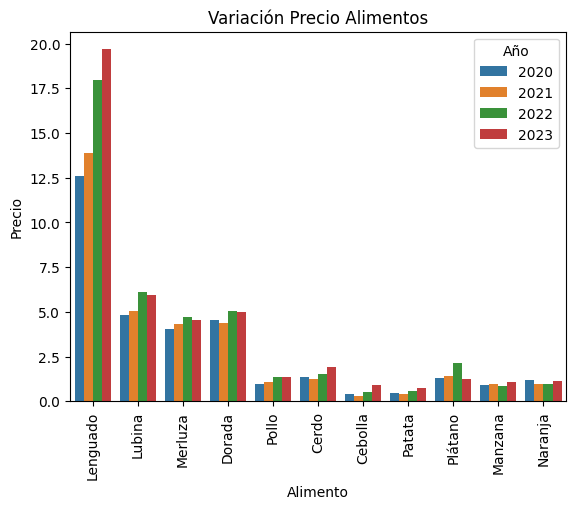

In [1577]:


df_melted = pd.melt(df_semanal[["Año", "Lenguado", "Lubina", "Merluza", "Dorada", "Pollo", "Cerdo", "Cebolla", "Patata", "Plátano", "Manzana", "Naranja"]], id_vars=['Año'], var_name='Alimento', value_name='Precio')

sns.barplot(x='Alimento', y='Precio', hue='Año', data=df_melted, errorbar=None)
plt.title("Variación Precio Alimentos")
plt.xticks(rotation=90);

In [1578]:
dump(df_melted, "df_melted.df")

['df_melted.df']

Ahora queremos analizar si los precios de los productos están correlacionados con las temperaturas, precipitaciones, el precio de la luz o el gas

Text(0.5, 1.0, 'Correlación de precios')

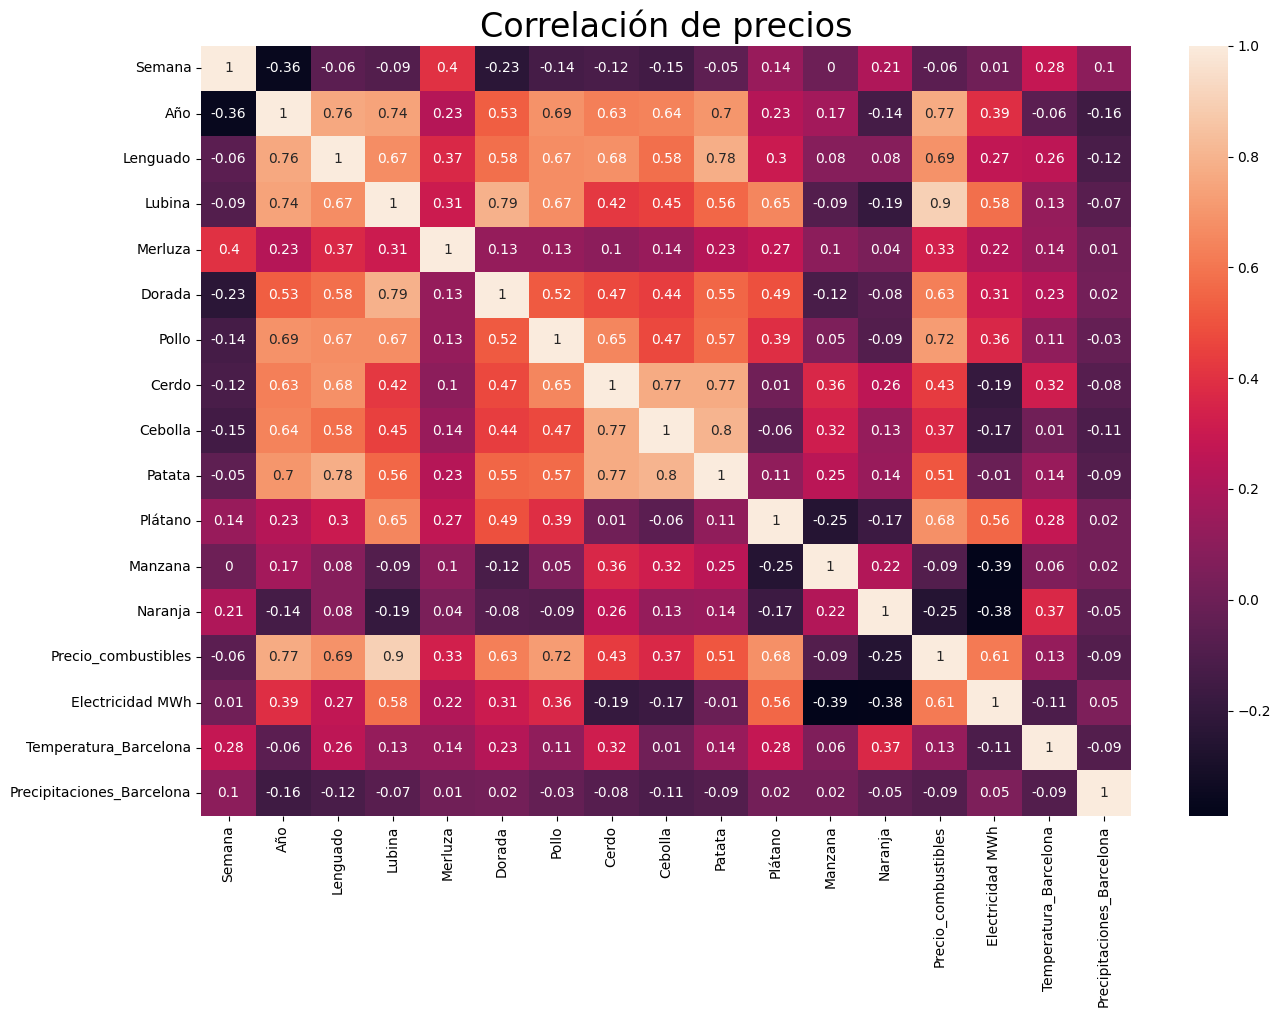

In [1579]:


plt.figure(figsize=(15,10))
sns.heatmap(df_semanal.corr().round(2), annot=True)
plt.title("Correlación de precios", fontsize=24)


In [1580]:
dump(df_semanal, "df_semanal.df")

['df_semanal.df']

Preprocesado

In [1581]:
df_preprocesado = df_semanal.copy()

In [1582]:
df_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 1 to 186
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Semana                     173 non-null    UInt32 
 1   Año                        173 non-null    int32  
 2   Lenguado                   173 non-null    float64
 3   Lubina                     173 non-null    float64
 4   Merluza                    173 non-null    float64
 5   Dorada                     173 non-null    float64
 6   Pollo                      173 non-null    float64
 7   Cerdo                      173 non-null    float64
 8   Cebolla                    173 non-null    float64
 9   Patata                     173 non-null    float64
 10  Plátano                    173 non-null    float64
 11  Manzana                    173 non-null    float64
 12  Naranja                    173 non-null    float64
 13  Precio_combustibles        173 non-null    float64
 14 

In [1583]:
df_preprocesado["Semana"] = df_preprocesado["Semana"].astype(int)

In [1584]:
df_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 1 to 186
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Semana                     173 non-null    int32  
 1   Año                        173 non-null    int32  
 2   Lenguado                   173 non-null    float64
 3   Lubina                     173 non-null    float64
 4   Merluza                    173 non-null    float64
 5   Dorada                     173 non-null    float64
 6   Pollo                      173 non-null    float64
 7   Cerdo                      173 non-null    float64
 8   Cebolla                    173 non-null    float64
 9   Patata                     173 non-null    float64
 10  Plátano                    173 non-null    float64
 11  Manzana                    173 non-null    float64
 12  Naranja                    173 non-null    float64
 13  Precio_combustibles        173 non-null    float64
 14 

In [1585]:
df_preprocesado.columns

Index(['Semana', 'Año', 'Lenguado', 'Lubina', 'Merluza', 'Dorada', 'Pollo',
       'Cerdo', 'Cebolla', 'Patata', 'Plátano', 'Manzana', 'Naranja',
       'Precio_combustibles', 'Electricidad MWh', 'Temperatura_Barcelona',
       'Precipitaciones_Barcelona'],
      dtype='object')

In [1605]:
columns = ['Lenguado', 'Lubina', 'Merluza', 'Dorada', 'Pollo', 'Cerdo', 'Cebolla', 'Patata', 'Plátano', 'Manzana', 'Naranja',
       'Precio_combustibles', 'Electricidad MWh', 'Temperatura_Barcelona',
       'Precipitaciones_Barcelona']
standard = StandardScaler()
df_preprocesado[columns] = standard.fit_transform(df_preprocesado[columns])

La lubina es mi target


In [1606]:
modelos = {
    "Regresor Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=20),
    "KNN": KNeighborsRegressor()
}

In [1607]:
X = df_preprocesado.drop("Lubina", axis=1)
y = df_preprocesado["Lubina"]

In [1608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=20)

In [1609]:
predicciones = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicciones[nombre] = modelo.predict(X_test)
    
predicciones["y_test"] = y_test

In [1610]:
dump(predicciones, "predicciones.df")

['predicciones.df']

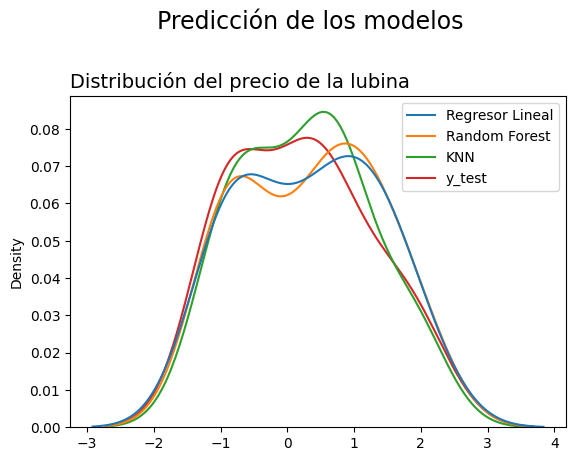

In [1611]:
sns.kdeplot(predicciones)
plt.title("Distribución del precio de la lubina", loc="left", fontsize=14)
plt.suptitle("Predicción de los modelos", fontsize=17)


fig = plt.gcf()
fig.subplots_adjust(top=0.8)

In [1612]:
metricas = []

for i in modelos:
    metricas.append({
        "modelo": i,
        "mse": mean_squared_error(y_test, predicciones[i]),
        "r2": r2_score(y_test, predicciones[i])        
    })


In [1613]:
df_metricas = pd.DataFrame(metricas)
df_metricas

,modelo,mse,r2
0,Regresor Lineal,0.094226,0.903321
1,Random Forest,0.055247,0.943315
2,KNN,0.047976,0.950775


In [1614]:
dump(df_metricas, "df_metricas.df")

['df_metricas.df']

Text(0.5, 0.98, 'Métricas de los modelos')

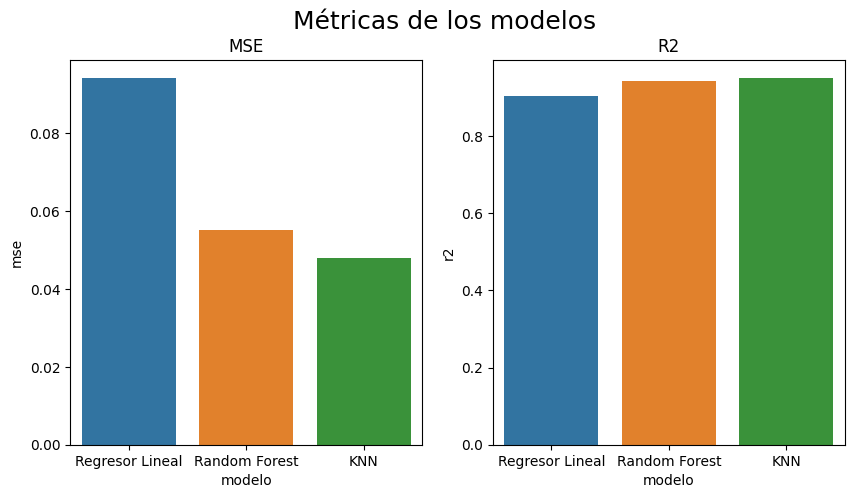

In [1615]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))
ax= ax.flatten()
sns.barplot(data=df_metricas, x="modelo", y="mse", ax= ax[0])
ax[0].set_title("MSE")

sns.barplot(data=df_metricas, x="modelo", y="r2", ax= ax[1])
ax[1].set_title("R2")

fig.suptitle("Métricas de los modelos", fontsize=18)

In [1628]:
columns = ['Lenguado', 'Merluza', 'Dorada', 'Pollo', 'Cerdo', 'Cebolla', 'Patata', 'Plátano', 'Manzana', 'Naranja',
           'Precio_combustibles', 'Electricidad MWh', 'Temperatura_Barcelona', 'Precipitaciones_Barcelona']
df_preprocesado1 = df_preprocesado.copy()
standard = StandardScaler()
df_preprocesado1[columns] = standard.fit_transform(df_preprocesado1[columns])

#Seguir pasos anteriores
X = df_preprocesado1.drop("Lubina", axis=1)
y = df_preprocesado1["Lubina"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=20)



modelo_rf = KNeighborsRegressor()
modelo_rf.fit(X_train, y_train)

# Nuevo dataframe
datos_2024 = {
    'Semana': [1],
    'Año': [2024],
    'Lenguado': [15],
    'Merluza': [10],
    'Dorada': [15],
    'Pollo': [3],
    'Cerdo': [25],
    'Cebolla': [1.5],
    'Patata': [1.4],
    'Plátano': [2],
    'Manzana': [1],
    'Naranja': [2],
    'Precio_combustibles': [1],
    'Electricidad MWh': [50],
    'Temperatura_Barcelona': [80],
    'Precipitaciones_Barcelona': [10]
}


X_2024 = pd.DataFrame(datos_2024)

# Aplicar la transformación de StandardScaler a las características de 2024
X_2024[columns] = standard.transform(X_2024[columns])

# Realizar la predicción con el modelo de Random Forest
prediccion_2024 = modelo_rf.predict(X_2024)

# Imprimir el resultado
print(f'Predicción del precio de la lubina para la semana 1 del año 2024: {prediccion_2024}')

Predicción del precio de la lubina para la semana 1 del año 2024: [0.92889883]


In [1617]:
dump(prediccion_2024, "prediccion_2024.df")

['prediccion_2024.df']